In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress


## Bonneville Dam Data Source

http://www.cbr.washington.edu/dart/query/adult_annual_sum


In [2]:
# Read in Bonneville Dam Spring Chinook Counts
bonneville_file = "Resources/Chinook_Bonneville_Counts.csv"

# Grab only the columns we want
bonneville_salmon_df = pd.read_csv(bonneville_file, usecols=["Project","Year","Dates", "Chinook"])

# Make sure we only get 2000 to 2020
bonneville_salmon_df =  bonneville_salmon_df[ 
    (bonneville_salmon_df["Year"] > 1999) & 
    (bonneville_salmon_df["Year"] < 2021)
]

# Clean up data types
bonneville_salmon_df["Year"] = bonneville_salmon_df["Year"].astype('int')
bonneville_salmon_df["Chinook"] = bonneville_salmon_df["Chinook"].astype('int')

bonneville_salmon_df

,Project,Year,Dates,Chinook
62,Bonneville,2000,3/15 - 5/31,178302
63,Bonneville,2001,3/15 - 5/31,391367
64,Bonneville,2002,3/15 - 5/31,268813
65,Bonneville,2003,3/15 - 5/31,192010
66,Bonneville,2004,3/15 - 5/31,170152
67,Bonneville,2005,3/15 - 5/31,74038
68,Bonneville,2006,3/15 - 5/31,96456
69,Bonneville,2007,3/15 - 5/31,66624
70,Bonneville,2008,3/15 - 5/31,125543
71,Bonneville,2009,3/15 - 5/31,114525


## Bonneville Below Data Source

https://waterdata.usgs.gov/usa/nwis/uv?site_no=14128870

mapper: https://maps.waterdata.usgs.gov/mapper/index.html

In [3]:
# Create bonneville below gage df
bonneville_below_gage_file = "Resources/Columbia_bonne-below.csv"
bonneville_below_gage_df = pd.read_csv(bonneville_below_gage_file, sep="\t")
bonneville_below_gage_df.head()

,agency_cd,site_no,datetime,Gage_Max,Status_Gage_Max,Gage_Min,Status_Gage_Min,Gage_Mean,Status_Gage_Mean
0,USGS,14128870,2000-01-01,15.97,A,14.21,A,15.00,A
1,USGS,14128870,2000-01-02,17.87,A,14.33,A,16.33,A
2,USGS,14128870,2000-01-03,19.86,A,15.99,A,17.40,A
3,USGS,14128870,2000-01-04,19.04,A,16.16,A,17.49,A
4,USGS,14128870,2000-01-05,19.24,A,15.70,A,17.02,A


In [4]:
# Clean the dataframe up and parse the dates
clean_bonneville_below_gage_df = bonneville_below_gage_df[["agency_cd", "site_no", "datetime", "Gage_Mean" ]].copy(deep=True)
clean_bonneville_below_gage_df.head()

,agency_cd,site_no,datetime,Gage_Mean
0,USGS,14128870,2000-01-01,15.00
1,USGS,14128870,2000-01-02,16.33
2,USGS,14128870,2000-01-03,17.40
3,USGS,14128870,2000-01-04,17.49
4,USGS,14128870,2000-01-05,17.02


In [5]:
# Split up the datetime because for later filtering and groupby
clean_bonneville_below_gage_df[['Year','Month','Day']] = clean_bonneville_below_gage_df['datetime'].str.split('-', expand=True)
clean_bonneville_below_gage_df = clean_bonneville_below_gage_df.drop(columns=['datetime'])
clean_bonneville_below_gage_df

,agency_cd,site_no,Gage_Mean,Year,Month,Day
0,USGS,14128870,15.00,2000,01,01
1,USGS,14128870,16.33,2000,01,02
2,USGS,14128870,17.40,2000,01,03
3,USGS,14128870,17.49,2000,01,04
4,USGS,14128870,17.02,2000,01,05
...,...,...,...,...,...,...
7607,USGS,14128870,10.86,2020,10,29
7608,USGS,14128870,8.96,2020,10,30
7609,USGS,14128870,8.87,2020,10,31
7610,USGS,14128870,11.50,2020,11,01


In [6]:
# Check the types now
clean_bonneville_below_gage_df.dtypes

agency_cd     object
site_no        int64
Gage_Mean    float64
Year          object
Month         object
Day           object
dtype: object

In [7]:
# Convert dates into integers
clean_bonneville_below_gage_df["Year"] = clean_bonneville_below_gage_df["Year"].astype("int")
clean_bonneville_below_gage_df["Month"] = clean_bonneville_below_gage_df["Month"].astype("int")
clean_bonneville_below_gage_df["Day"] = clean_bonneville_below_gage_df["Day"].astype("int")
clean_bonneville_below_gage_df.dtypes

agency_cd     object
site_no        int64
Gage_Mean    float64
Year           int32
Month          int32
Day            int32
dtype: object

In [8]:
# Since this is the spring chinook spawn grab march to may
clean_bonneville_below_gage_df = clean_bonneville_below_gage_df[
    (clean_bonneville_below_gage_df["Month"] >= 3) &
    (clean_bonneville_below_gage_df["Month"] <= 5) 
].reset_index(drop=True)
clean_bonneville_below_gage_df

,agency_cd,site_no,Gage_Mean,Year,Month,Day
0,USGS,14128870,17.22,2000,3,1
1,USGS,14128870,17.44,2000,3,2
2,USGS,14128870,17.45,2000,3,3
3,USGS,14128870,16.17,2000,3,4
4,USGS,14128870,15.31,2000,3,5
...,...,...,...,...,...,...
1927,USGS,14128870,22.96,2020,5,27
1928,USGS,14128870,23.27,2020,5,28
1929,USGS,14128870,25.13,2020,5,29
1930,USGS,14128870,25.49,2020,5,30


In [9]:
# Group by year to match the shape of the Bonneville Salmon Data
mean_clean_bonneville_below_gage_df = clean_bonneville_below_gage_df.groupby("Year").mean()
mean_clean_bonneville_below_gage_df = mean_clean_bonneville_below_gage_df[["site_no", "Gage_Mean"]].reset_index()
mean_clean_bonneville_below_gage_df

,Year,site_no,Gage_Mean
0,2000,14128870,19.607174
1,2001,14128870,11.955217
2,2002,14128870,16.781522
3,2003,14128870,17.521087
4,2004,14128870,15.494239
5,2005,14128870,15.113043
6,2006,14128870,20.784783
7,2007,14128870,19.088043
8,2008,14128870,17.223696
9,2009,14128870,17.656848


In [10]:
# Merge Salmon Data with Gage data
merged_bonneville_salmon_data_df = pd.merge(bonneville_salmon_df, mean_clean_bonneville_below_gage_df, on="Year")
merged_bonneville_salmon_data_df

,Project,Year,Dates,Chinook,site_no,Gage_Mean
0,Bonneville,2000,3/15 - 5/31,178302,14128870,19.607174
1,Bonneville,2001,3/15 - 5/31,391367,14128870,11.955217
2,Bonneville,2002,3/15 - 5/31,268813,14128870,16.781522
3,Bonneville,2003,3/15 - 5/31,192010,14128870,17.521087
4,Bonneville,2004,3/15 - 5/31,170152,14128870,15.494239
5,Bonneville,2005,3/15 - 5/31,74038,14128870,15.113043
6,Bonneville,2006,3/15 - 5/31,96456,14128870,20.784783
7,Bonneville,2007,3/15 - 5/31,66624,14128870,19.088043
8,Bonneville,2008,3/15 - 5/31,125543,14128870,17.223696
9,Bonneville,2009,3/15 - 5/31,114525,14128870,17.656848


The r-value is: -0.459542916303345
The r2-value is: 0.21117969192458313
The p-value is: 0.03609843476434563


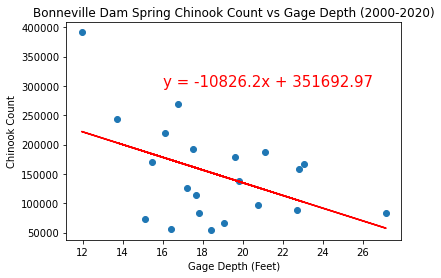

In [11]:
# Plot a scatter and regression of river depth and salmon counts to see if any correlation

slope, intercept, rvalue, pvalue, stderr = linregress(merged_bonneville_salmon_data_df["Gage_Mean"], 
                                                      merged_bonneville_salmon_data_df["Chinook"])
regress_values = merged_bonneville_salmon_data_df["Gage_Mean"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

fig, ax = plt.subplots()
ax.set_xlabel("Gage Depth (Feet)")
ax.set_ylabel("Chinook Count")
ax.set_title("Bonneville Dam Spring Chinook Count vs Gage Depth (2000-2020)")
ax.annotate(line_eq, (16,300000), fontsize=15, color="red")
ax.plot(merged_bonneville_salmon_data_df["Gage_Mean"], regress_values, "r-")
ax.scatter(merged_bonneville_salmon_data_df["Gage_Mean"],merged_bonneville_salmon_data_df["Chinook"])

## Bonneville Below Dodson Data Source

https://waterdata.usgs.gov/usa/nwis/uv?site_no=453630122021400

mapper: https://maps.waterdata.usgs.gov/mapper/index.html

In [12]:
# Get Dodson Temperature Data just below Bonneville
below_bonneville_dodson_file = "Resources/columbia_dodson.csv"
below_bonneville_dodson_df = pd.read_csv(below_bonneville_dodson_file, sep="\t")
below_bonneville_dodson_df.head()

,agency_cd,site_no,datetime,tz_cd,temperature_c,status_temp,barometric,status_barmetric,pressure_gas,status_pressure_gas
0,USGS,453630122021400,2007-10-01 01:00,PDT,17.3,A,760.0,A,769.0,A
1,USGS,453630122021400,2007-10-01 02:00,PDT,17.2,A,761.0,A,767.0,A
2,USGS,453630122021400,2007-10-01 03:00,PDT,17.1,A,761.0,A,765.0,A
3,USGS,453630122021400,2007-10-01 04:00,PDT,17.1,A,762.0,A,764.0,A
4,USGS,453630122021400,2007-10-01 05:00,PDT,17.0,A,762.0,A,762.0,A


In [13]:
# Reduce data frame down to columns that I need
clean_below_bonneville_dodson_temp_df = below_bonneville_dodson_df[["agency_cd", "site_no", "datetime", "temperature_c" ]].copy(deep=True)
clean_below_bonneville_dodson_temp_df.head()

,agency_cd,site_no,datetime,temperature_c
0,USGS,453630122021400,2007-10-01 01:00,17.3
1,USGS,453630122021400,2007-10-01 02:00,17.2
2,USGS,453630122021400,2007-10-01 03:00,17.1
3,USGS,453630122021400,2007-10-01 04:00,17.1
4,USGS,453630122021400,2007-10-01 05:00,17.0


In [14]:
# Parse the date fields for groupby
clean_below_bonneville_dodson_temp_df[['Date','Hour']] = clean_below_bonneville_dodson_temp_df['datetime'].str.split(' ', expand=True)
clean_below_bonneville_dodson_temp_df = clean_below_bonneville_dodson_temp_df.drop(columns=['datetime'])
clean_below_bonneville_dodson_temp_df[['Year','Month', 'Day']] = clean_below_bonneville_dodson_temp_df['Date'].str.split('-', expand=True)

# Change the datatypes to int for filtering
clean_below_bonneville_dodson_temp_df["Year"] = clean_below_bonneville_dodson_temp_df["Year"].astype("int")
clean_below_bonneville_dodson_temp_df["Month"] = clean_below_bonneville_dodson_temp_df["Month"].astype("int")
clean_below_bonneville_dodson_temp_df["Day"] = clean_below_bonneville_dodson_temp_df["Day"].astype("int")

# Since this is the spring chinook spawn grab march to may
clean_below_bonneville_dodson_temp_df = clean_below_bonneville_dodson_temp_df[
    (clean_below_bonneville_dodson_temp_df["Month"] >= 3) &
    (clean_below_bonneville_dodson_temp_df["Month"] <= 5) 
].reset_index(drop=True)

# Get the yearly mean for data shape
clean_below_bonneville_dodson_temp_mean_df = clean_below_bonneville_dodson_temp_df.groupby("Year").mean()
clean_below_bonneville_dodson_temp_mean_df

# Keep only columns we need
clean_below_bonneville_dodson_temp_mean_df = clean_below_bonneville_dodson_temp_mean_df[["site_no", "temperature_c"]].reset_index()
clean_below_bonneville_dodson_temp_mean_df

,Year,site_no,temperature_c
0,2008,4.536301e+14,7.062133
1,2009,4.536301e+14,5.700816
2,2010,4.536301e+14,9.606026
3,2011,4.536301e+14,8.176710
4,2012,4.536301e+14,8.823833
5,2013,4.536301e+14,9.661758
6,2014,4.536301e+14,9.381052
7,2015,4.536301e+14,10.745855
8,2016,4.536301e+14,10.834527
9,2017,4.536301e+14,9.605398


In [15]:
# Merge salmon data with temperature data
merged_clean_below_bonneville_dodson_temp_mean_df = pd.merge(bonneville_salmon_df, clean_below_bonneville_dodson_temp_mean_df, on="Year" )

# Create a Farenhieght Temperature
merged_clean_below_bonneville_dodson_temp_mean_df['temperature_f'] = merged_clean_below_bonneville_dodson_temp_mean_df['temperature_c'] * 1.8 + 32

merged_clean_below_bonneville_dodson_temp_mean_df

,Project,Year,Dates,Chinook,site_no,temperature_c,temperature_f
0,Bonneville,2008,3/15 - 5/31,125543,4.536301e+14,7.062133,44.711839
1,Bonneville,2009,3/15 - 5/31,114525,4.536301e+14,5.700816,42.261469
2,Bonneville,2010,3/15 - 5/31,244385,4.536301e+14,9.606026,49.290847
3,Bonneville,2011,3/15 - 5/31,167097,4.536301e+14,8.176710,46.718079
4,Bonneville,2012,3/15 - 5/31,158075,4.536301e+14,8.823833,47.882900
5,Bonneville,2013,3/15 - 5/31,83299,4.536301e+14,9.661758,49.391164
6,Bonneville,2014,3/15 - 5/31,188078,4.536301e+14,9.381052,48.885893
7,Bonneville,2015,3/15 - 5/31,220250,4.536301e+14,10.745855,51.342538
8,Bonneville,2016,3/15 - 5/31,137176,4.536301e+14,10.834527,51.502148
9,Bonneville,2017,3/15 - 5/31,83616,4.536301e+14,9.605398,49.289717


The r-value is: 0.14618745407240513
The r2-value is: 0.02137077172817156
The p-value is: 0.6336819253792416


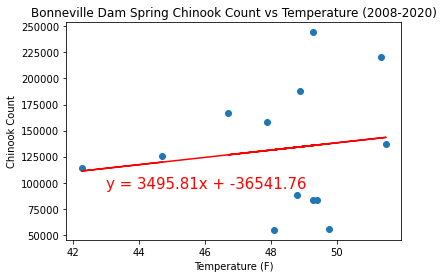

In [16]:
# Plot a scatter and regression of river temperature and salmon counts to see if any correlation

slope, intercept, rvalue, pvalue, stderr = linregress(merged_clean_below_bonneville_dodson_temp_mean_df["temperature_f"], 
                                                      merged_clean_below_bonneville_dodson_temp_mean_df["Chinook"])
regress_values = merged_clean_below_bonneville_dodson_temp_mean_df["temperature_f"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

fig, ax = plt.subplots()
ax.set_xlabel("Temperature (F)")
ax.set_ylabel("Chinook Count")
ax.set_title("Bonneville Dam Spring Chinook Count vs Temperature (2008-2020)")
ax.annotate(line_eq, (43,95000), fontsize=15, color="red")
ax.plot(merged_clean_below_bonneville_dodson_temp_mean_df["temperature_f"], regress_values, "r-")
ax.scatter(merged_clean_below_bonneville_dodson_temp_mean_df["temperature_f"],merged_clean_below_bonneville_dodson_temp_mean_df["Chinook"])